Importing the dependencies

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


Data collection and analysis

In [56]:
#loading the csv file to pandas data frame
customer_data= pd.read_csv('/content/Mall_Customers.csv')

In [57]:
#first five columns of the data
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [58]:
#finding the number of columns and rows
customer_data.shape

(200, 5)

In [59]:
#getting some information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
customer_data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [61]:
#finding the null values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the annual income columns & spending score column

In [62]:
X=customer_data.iloc[:,[3,4]].values #locate value of 3 and 4 column

In [63]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of the clusters
WCSS- within cluster sum of square


In [64]:
#finding wcss value for diffrent number of cluster
wcss=[]
for i in range (1,11):
  Kmeans=KMeans(n_clusters=i ,init='k-means++', random_state=42)#for random state we can take any number
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)#it will give WCSS value for each cluster and that value store in a list WCSS[]

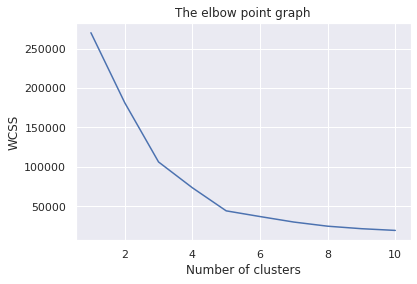

In [65]:
#plor an elbow graph  -to see for which cluster we get low wcss value
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [66]:
#optimum number of clusters= 5

Training the K-means clustering model

In [67]:
Kmeans=KMeans(n_clusters=5, init="k-means++", random_state=0)
#return the label for each cdata point basec on thier cluster(all the rows separated to 5 clusters)
Y= Kmeans.fit_predict(X)#fitting the value of x to cjeck in which cluster they are belong to
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


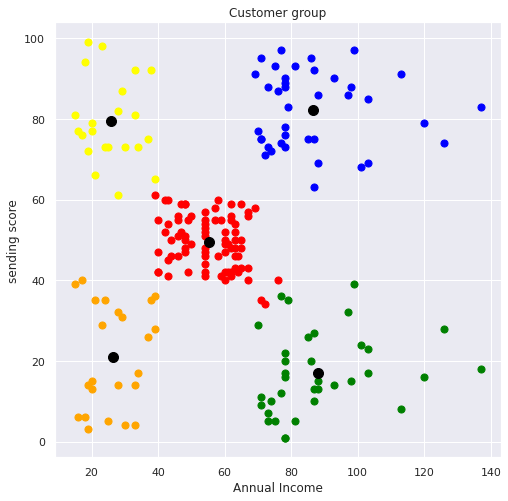

In [68]:
#plotting all the cluster and the centroid
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green',label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red',label='cluster 1')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue',label='cluster 1')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow',label='cluster 1')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='orange',label='cluster 1')

#plot the centroid
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')
plt.title('Customer group')
plt.xlabel('Annual Income')
plt.ylabel('sending score')
plt.show()